<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-setup" data-toc-modified-id="Project-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project setup</a></span><ul class="toc-item"><li><span><a href="#Module-installation" data-toc-modified-id="Module-installation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Module installation</a></span></li><li><span><a href="#Folder-path-definitions-and-imports" data-toc-modified-id="Folder-path-definitions-and-imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Folder path definitions and imports</a></span></li></ul></li><li><span><a href="#Image-processing-and-vision" data-toc-modified-id="Image-processing-and-vision-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image processing and vision</a></span><ul class="toc-item"><li><span><a href="#Image-acquisition" data-toc-modified-id="Image-acquisition-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Image acquisition</a></span></li><li><span><a href="#ArUco-markers" data-toc-modified-id="ArUco-markers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ArUco markers</a></span></li><li><span><a href="#ArUco-markers-detection" data-toc-modified-id="ArUco-markers-detection-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ArUco markers detection</a></span></li><li><span><a href="#Map-creation" data-toc-modified-id="Map-creation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Map creation</a></span></li><li><span><a href="#Thymio-and-objective-pose-measurement" data-toc-modified-id="Thymio-and-objective-pose-measurement-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Thymio and objective pose measurement</a></span></li></ul></li><li><span><a href="#Global-path-creation" data-toc-modified-id="Global-path-creation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Global path creation</a></span></li><li><span><a href="#Connection-to-the-Thymio" data-toc-modified-id="Connection-to-the-Thymio-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Connection to the Thymio</a></span></li><li><span><a href="#Moving-the-Thymio" data-toc-modified-id="Moving-the-Thymio-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Moving the Thymio</a></span><ul class="toc-item"><li><span><a href="#Speed-coefficient-measurement" data-toc-modified-id="Speed-coefficient-measurement-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Speed coefficient measurement</a></span></li><li><span><a href="#Rotation-coefficient-measurement" data-toc-modified-id="Rotation-coefficient-measurement-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Rotation coefficient measurement</a></span></li></ul></li><li><span><a href="#Pose-estimation:-Kalman-filter" data-toc-modified-id="Pose-estimation:-Kalman-filter-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pose estimation: Kalman filter</a></span><ul class="toc-item"><li><span><a href="#Covariance-matrices-measurement-(Q,-R)" data-toc-modified-id="Covariance-matrices-measurement-(Q,-R)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Covariance matrices measurement (Q, R)</a></span></li></ul></li><li><span><a href="#Local-avoidance" data-toc-modified-id="Local-avoidance-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Local avoidance</a></span></li><li><span><a href="#Demonstration" data-toc-modified-id="Demonstration-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Demonstration</a></span><ul class="toc-item"><li><span><a href="#Global-path-following" data-toc-modified-id="Global-path-following-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Global path following</a></span></li><li><span><a href="#Transition-between-local-and-global-navigation" data-toc-modified-id="Transition-between-local-and-global-navigation-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Transition between local and global navigation</a></span></li><li><span><a href="#Obstructing-the-camera" data-toc-modified-id="Obstructing-the-camera-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Obstructing the camera</a></span></li><li><span><a href="#Thymio-and-obstacle-kidnapping-situations" data-toc-modified-id="Thymio-and-obstacle-kidnapping-situations-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Thymio and obstacle kidnapping situations</a></span></li></ul></li></ul></div>

# Project setup

## Module installation
Our project uses modules from the extended OpenCV library for python. It is then necessary to first uninstall the base library and install the extended one to avoid any conflict.

In [ ]:
!pip uninstall opencv-python

In [1]:
!pip install --user opencv-contrib-python

## Folder path definitions and imports

In [2]:
# ========================================================================== #
#  Imports.                                                                  # 
# ========================================================================== #

import os
import sys
import matplotlib.pyplot as plt

# ========================================================================== #
#  Folder paths.                                                             # 
# ========================================================================== #

sys.path.insert(1, 'src')
sys.path.insert(1, 'img')

# Image processing and vision

## Image acquisition
We use for this project a high perfomance webcam (Logitech Brio), which ensures no error when starting the camera feed and good image quality. The following section is used to save pictures to the **img/cam** folder, pictures which will be used in the following sections as test images.

In [3]:
from camera import *


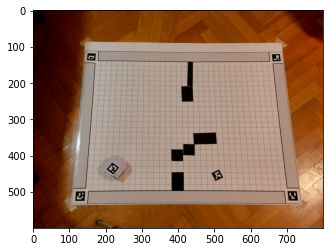

In [24]:
# Get video capture instance. Default image size is 800 x 600.
cam = init_camera()

## First take a picture in normal lighting conditions
img_taken = False
while not img_taken:
    img_normal, img_taken = take_picture(cam)
save_camera_img(img_normal, "img_normal")
plt.imshow(cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB))

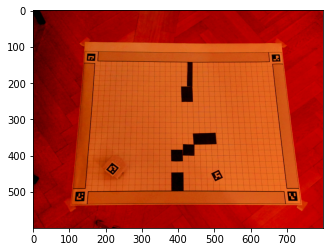

In [22]:
cam = init_camera()
## Then take it in low lighting conditions
img_taken = False
while not img_taken:
    img_low, img_taken = take_picture(cam)
save_camera_img(img_low, "img_low")
plt.imshow(cv2.cvtColor(img_low, cv2.COLOR_BGR2RGB))

We can see in this last image that in low lighting conditions, the camera's auto white balance and auto exposure adjustments result in completely wrong color values. We could disable it in the camera settings, but for the purpose of demonstrating the robustness of our map creation and feature detection algorithm, we will leave it as is.

## ArUco markers
We will use ArUco markers in this project to detect map corners, as well as the Thymio and objective positions. ArUco markers come in different sizes (4x4 up to 7x7 using aruco module from cv2). For this project, we will use the **DICT_4X4_50** dictionary, which is a set of 50 different markers, of size 4x4 (or 6x6 if edges are accounted for).

In this project, we will use 6 different ArUco markers: 4 for detecting the corners of the map, 1 for locating the Thymio and finally 1 for detecting the position of the global objective.

The first step is to assign a unique ArUco marker ID (corresponding to a certain entry in the **DICT_4X4_50** dictionary) to each of the features that we want to detect. We arbitrarily choose the following IDs for each feature:
- Map IDs = [1, 2, 3, 4]
- Thymio ID = 5
- Objective ID = 6

The markers can then be generated using our custom function **generate_aruco_markers**.

In [5]:
from cv2 import aruco
from generate_aruco_markers import *

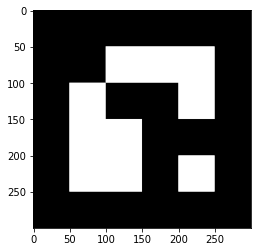

In [6]:
MAP_CORNER_ID = [1, 2, 3, 4]
THYMIO_ID = 5
OBJECTIVE_ID = 6

# Example of an ArUco marker generated using Thymio's marker ID.
marker = generate_aruco_marker(THYMIO_ID)
plt.imshow(marker, cmap = 'Greys_r')

## ArUco markers detection
Once printed, ArUco markers can then be detected. The following code, taken from https://www.pyimagesearch.com/2020/12/21/detecting-aruco-markers-with-opencv-and-python/, serves as an example of tag detection.

In [26]:
# This function displays detected aruco markers in an image. Labels (IDs) are also shown on top of the marker.
def display_aruco_markers(img):
    aruco_dict = arucoDict = cv2.aruco.Dictionary_get(DEF_ARUCO_DICT)
    aruco_params = cv2.aruco.DetectorParameters_create()
    if img_taken:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # cv2.imshow('raw image', img)
        # cv2.waitKey(1)
        (corners, ids, rejected) = cv2.aruco.detectMarkers(img, aruco_dict, parameters=aruco_params)
        # verify *at least* one ArUco marker was detected
        if len(corners) > 3:
            # flatten the ArUco IDs list
            ids = ids.flatten()
            # loop over the detected ArUCo corners
            for (markerCorner, markerID) in zip(corners, ids):
                # extract the marker corners (which are always returned in
                # top-left, top-right, bottom-right, and bottom-left order)
                corners = markerCorner.reshape((4, 2))
                (topLeft, topRight, bottomRight, bottomLeft) = corners
                # convert each of the (x, y)-coordinate pairs to integers
                topRight = (int(topRight[0]), int(topRight[1]))
                bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
                bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
                topLeft = (int(topLeft[0]), int(topLeft[1]))
                # draw the bounding box of the ArUCo detection
                cv2.line(img, topLeft, topRight, (0, 255, 0), 2)
                cv2.line(img, topRight, bottomRight, (0, 255, 0), 2)
                cv2.line(img, bottomRight, bottomLeft, (0, 255, 0), 2)
                cv2.line(img, bottomLeft, topLeft, (0, 255, 0), 2)
                # compute and draw the center (x, y)-coordinates of the ArUco
                # marker
                cX = int((topLeft[0] + bottomRight[0]) / 2.0)
                cY = int((topLeft[1] + bottomRight[1]) / 2.0)
                cv2.circle(img, (cX, cY), 4, (0, 0, 255), -1)
                # draw the ArUco marker ID on the image
                cv2.putText(img, str(markerID),
                    (topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 255, 0), 2)
                print("[INFO] ArUco marker ID: {}".format(markerID))
                # show the output image
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            print("ArUco markers not found")

[INFO] ArUco marker ID: 4
[INFO] ArUco marker ID: 3
[INFO] ArUco marker ID: 6
[INFO] ArUco marker ID: 5
[INFO] ArUco marker ID: 2
[INFO] ArUco marker ID: 1


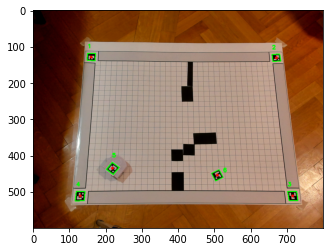

In [27]:
# In normal lighting conditions
img = cv2.imread(dirname + "img_normal.png")
display_aruco_markers(img)

[INFO] ArUco marker ID: 3
[INFO] ArUco marker ID: 4
[INFO] ArUco marker ID: 6
[INFO] ArUco marker ID: 5
[INFO] ArUco marker ID: 2
[INFO] ArUco marker ID: 1


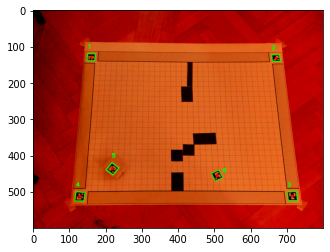

In [28]:
# In low lighting conditions
img = cv2.imread(dirname + "img_low.png")
display_aruco_markers(img)

We can indeed see that marker detection is extremely robust. In more tests that won't be shown here, we've observed that it can detect markers up to an inclination of around 70 degrees, which means that the camera doesn't have to be straight on top of the map.

## Map creation

## Thymio and objective pose measurement

# Global path creation

# Connection to the Thymio

# Moving the Thymio

## Speed coefficient measurement

## Rotation coefficient measurement

# Pose estimation: Kalman filter

## Covariance matrices measurement (Q, R)

# Local avoidance

# Demonstration

## Global path following

## Transition between local and global navigation

## Obstructing the camera

## Thymio and obstacle kidnapping situations